# Superstore USA Dataset


### 1. Load the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Superstore_USA.xlsx', sheet_name = None)

In [3]:
# reading the tables from the sheets
s1 = df.get('Orders')
s2 = df.get('Returns')
s3 = df.get('Users')

In [4]:
# Joining all the tables
df1 = pd.merge(s1,s2,how='left').merge(s3,how='left')
df1['Status'].fillna('Not Returned',inplace=True)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9426 entries, 0 to 9425
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [6]:
df1

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Status,Manager
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Addison,60101,2012-05-28,2012-05-30,1.320000,2,5.90,88525,Not Returned,Chris
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Anacortes,98221,2010-07-07,2010-07-08,4.560000,4,13.01,88522,Not Returned,William
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Anacortes,98221,2011-07-27,2011-07-28,-47.640000,7,49.92,88523,Not Returned,William
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,Anacortes,98221,2011-07-27,2011-07-28,-30.510000,7,41.64,88523,Not Returned,William
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,Anacortes,98221,2011-07-27,2011-07-27,998.202300,8,1446.67,88523,Not Returned,William
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,Charleston,25314,2013-05-14,2013-05-15,137.860000,13,447.87,87532,Not Returned,Erin
9422,20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,Charleston,25314,2013-05-14,2013-05-14,-39.070000,3,13.23,87532,Not Returned,Erin
9423,24491,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,...,Charleston,25314,2013-09-12,2013-09-14,-1225.029097,4,2215.93,87533,Not Returned,Erin
9424,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,Cheyenne,82001,2010-02-08,2010-02-11,349.485000,5,506.50,87530,Not Returned,William


In [7]:
# Changing the dtypes
cols = ['Row ID','Customer ID','Postal Code','Order ID']
df1[cols] = df1[cols].astype(str)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9426 entries, 0 to 9425
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   object        
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   object        
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [9]:
df1.Status.value_counts(dropna=False)

Not Returned    9328
Returned          98
Name: Status, dtype: int64

### 3. Find out how many returns that we have received and with a product id

In [10]:
# Since we don't have product id column, 
# product category and product sub category are used
returned = df1[df1['Status'] == 'Returned']

In [11]:
returned.set_index(['Product Category','Product Sub-Category'],inplace=True)

In [12]:
returned[['Product Name']].sort_values(by='Product Sub-Category')

Product Name
Product Category Product Sub-Category                                                             
Office Supplies  Appliances                                                 Staples 6 Outlet Surge
                 Binders and Binder Accessories                Ibico Hi-Tech Manual Binding System
                 Binders and Binder Accessories  GBC Laser Imprintable Binding System Covers, D...
                 Binders and Binder Accessories           GBC DocuBind P100 Manual Binding Machine
                 Binders and Binder Accessories       Mead 1st Gear 2" Zipper Binder, Asst. Colors
...                                                                                            ...
Technology       Telephones and Communication                                                 6160
                 Telephones and Communication                                                  232
                 Telephones and Communication                                      600 Series Flip
                 Telephones and Communication                                                  T60
                 Telephones and Communication                                          Accessory39

[98 rows x 1 columns]

In [13]:
count = returned.groupby(['Product Category','Product Sub-Category'])[['Product Name']].count()

In [14]:
count.rename(columns={'Product Name': 'Product Count'})

Product Count
Product Category Product Sub-Category                         
Furniture        Bookcases                                   1
                 Chairs & Chairmats                          6
                 Office Furnishings                          7
                 Tables                                      5
Office Supplies  Appliances                                  1
                 Binders and Binder Accessories             12
                 Envelopes                                   5
                 Labels                                      3
                 Paper                                      16
                 Pens & Art Supplies                        11
                 Rubber Bands                                2
                 Scissors, Rulers and Trimmers               2
                 Storage & Organization                      6
Technology       Computer Peripherals                        9
                 Office Machines                             3
                 Telephones and Communication                9

### 4. Join Orders and Returns data

In [15]:
# df1 = pd.merge(s1,s2,how='left').merge(s3,how='left')

In [16]:
df1.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Status,Manager
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525,Not Returned,Chris
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522,Not Returned,William
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523,Not Returned,William
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523,Not Returned,William
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523,Not Returned,William


### 5. How many unique customers we have

In [17]:
unique_customers = s1['Customer ID'].nunique()
print(f"Number of unique customers: {unique_customers}")

Number of unique customers: 2703


### 6. find out in how many regions we are selling a product and who is a manager for the respective region

In [18]:
df1.groupby(['Product Name','Region','Manager'])[['Sales']].count()

Sales
Product Name                                       Region  Manager       
"While you Were Out" Message Book, One Form per... Central Chris        2
                                                   South   Sam          1
                                                   West    William      3
#10 Self-Seal White Envelopes                      Central Chris        3
                                                   West    William      2
...                                                                   ...
iDEN i95                                           East    Erin         2
                                                   South   Sam          1
iDENi80s                                           Central Chris        3
                                                   East    Erin         1
                                                   West    William      1

[3976 rows x 1 columns]

### 7 .
#### (i) find out how many different shipment mode that we have and 

In [19]:
shipment_mode = list(s1['Ship Mode'].unique())

print(f'Count of unique shipment modes: {len(shipment_mode)}')
print(shipment_mode)

Count of unique shipment modes: 3
['Regular Air', 'Express Air', 'Delivery Truck']


#### (ii) what is a percentage usablity of all the shipment mode with respect to dataset 

Regular Air       74.644600
Delivery Truck    13.611288
Express Air       11.744112
Name: Ship Mode, dtype: float64


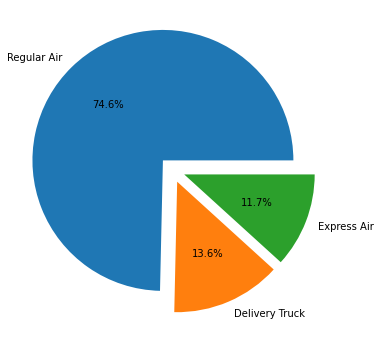

In [20]:
individual = s1['Ship Mode'].value_counts()
total = s1['Ship Mode'].value_counts().sum()
percentages = (individual/total)*100
print(percentages)
plt.figure(figsize=(6,6))
plt.pie(percentages,explode=[0.1,0.1,0.1], labels = percentages.index,autopct='%1.1f%%')
plt.show()

### 8. Create a new column and try to find out a difference b/w order data and shipment data 

In [21]:
df1['Delivery Days'] = df1['Ship Date'] - df1['Order Date']

In [22]:
df1

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Status,Manager,Delivery Days
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,60101,2012-05-28,2012-05-30,1.320000,2,5.90,88525,Not Returned,Chris,2 days
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,98221,2010-07-07,2010-07-08,4.560000,4,13.01,88522,Not Returned,William,1 days
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,98221,2011-07-27,2011-07-28,-47.640000,7,49.92,88523,Not Returned,William,1 days
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,98221,2011-07-27,2011-07-28,-30.510000,7,41.64,88523,Not Returned,William,1 days
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,98221,2011-07-27,2011-07-27,998.202300,8,1446.67,88523,Not Returned,William,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,25314,2013-05-14,2013-05-15,137.860000,13,447.87,87532,Not Returned,Erin,1 days
9422,20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,25314,2013-05-14,2013-05-14,-39.070000,3,13.23,87532,Not Returned,Erin,0 days
9423,24491,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,...,25314,2013-09-12,2013-09-14,-1225.029097,4,2215.93,87533,Not Returned,Erin,2 days
9424,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,82001,2010-02-08,2010-02-11,349.485000,5,506.50,87530,Not Returned,William,3 days


### 9. Based on Q.8 find out for which order id we have shipment duration more than 10 days


In [23]:
gt10 = df1[df1['Delivery Days'] > '10 days']

In [24]:
gt10[['Order ID','Delivery Days']].sort_values(by='Delivery Days',ascending=False)

,Order ID,Delivery Days
2515,86177,92 days
643,87215,84 days
8983,19841,31 days
8997,87300,31 days
1699,19556,28 days
1680,87957,28 days
8996,87300,27 days
8982,19841,27 days
5881,91294,24 days
5859,87572,22 days


### 10. Try to find out a list of a returned order which shipment duration was more than 15 days and find out that region manager

In [25]:
gt15 = df1[df1['Delivery Days'] > '15 days']

In [26]:
gt15[gt15['Status'] == 'Returned'] 

# No product is returned which is delivered 15 days after the ordered date.

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Status,Manager,Delivery Days


In [27]:
gt15[['Order ID','Delivery Days','Region','Manager','Status']].sort_values(by='Delivery Days')

,Order ID,Delivery Days,Region,Manager,Status
1678,87957,17 days,West,William,Not Returned
1697,19556,17 days,West,William,Not Returned
5673,88352,17 days,East,Erin,Not Returned
8609,86436,17 days,South,Sam,Not Returned
8607,86434,18 days,South,Sam,Not Returned
8993,19841,19 days,East,Erin,Not Returned
8610,86436,19 days,South,Sam,Not Returned
8973,87300,19 days,South,Sam,Not Returned
5859,87572,22 days,South,Sam,Not Returned
5881,91294,24 days,West,William,Not Returned


In [28]:
# Restructuring the Data
indexes = ['Region','Manager']
cols = ['Delivery Days','Order ID','Status']
sort = ['Region','Delivery Days']

gt15.set_index(indexes).sort_values(by=sort,ascending=False)[cols]

Delivery Days Order ID        Status
Region  Manager                                     
West    William       92 days    86177  Not Returned
        William       28 days    87957  Not Returned
        William       28 days    19556  Not Returned
        William       24 days    91294  Not Returned
        William       17 days    87957  Not Returned
        William       17 days    19556  Not Returned
South   Sam           22 days    87572  Not Returned
        Sam           19 days    86436  Not Returned
        Sam           19 days    87300  Not Returned
        Sam           18 days    86434  Not Returned
        Sam           17 days    86436  Not Returned
East    Erin          31 days    19841  Not Returned
        Erin          31 days    87300  Not Returned
        Erin          27 days    19841  Not Returned
        Erin          27 days    87300  Not Returned
        Erin          19 days    19841  Not Returned
        Erin          17 days    88352  Not Returned
Central Chris         84 days    87215  Not Returned

### 11. Which region is more profitable 

In [29]:
df1.groupby('Region').sum().sort_values(by=['Profit'],ascending=False)

,Discount,Unit Price,Shipping Cost,Product Base Margin,Profit,Quantity ordered new,Sales
Region,,,,,,,
Central,143.06,234833.53,37474.52,1473.68,519825.567067,38083,2540341.62
East,114.45,186664.00,30393.51,1173.16,377566.186045,34833,2422804.68
West,113.75,243791.03,29407.65,1161.43,310849.453897,33739,2391438.80
South,96.53,167061.98,23331.33,982.75,104201.192420,23409,1597346.22


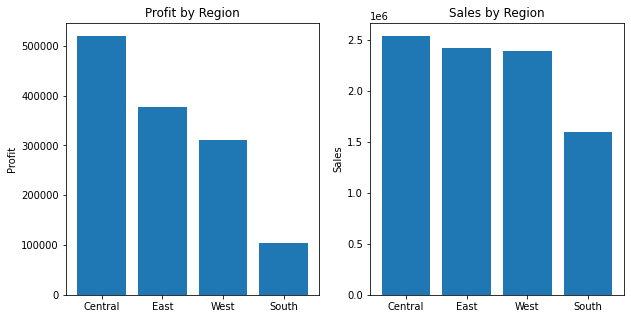

In [30]:
profit_by_region = df1.groupby('Region')['Profit'].sum().sort_values(ascending=False)
sales_by_region = df1.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Plotting
fig = plt.figure(figsize=(10,5))

# profit by region - subplot
sub1 = fig.add_subplot(121)
sub1.bar(profit_by_region.index,profit_by_region.values)
sub1.set_title('Profit by Region')
sub1.set_ylabel("Profit")

# sales by region - subplot
sub2 = fig.add_subplot(122)
sub2.bar(sales_by_region.index,sales_by_region.values)
sub2.set_title('Sales by Region')
sub2.set_ylabel("Sales")
plt.show()

### 12. In which country we are giving more discount

In [31]:
# As the data belong to only USA, discount by country doesn't work.
# So, discount by state and discount by region are calculated 
# Results are shown below.

#### Discount by State

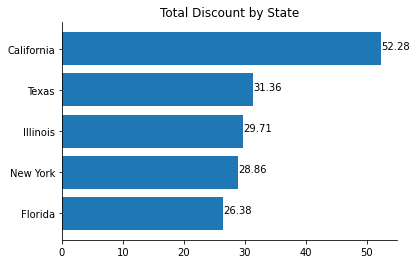

In [32]:
discount_by_state= df1.groupby('State or Province')['Discount'].sum().sort_values()
max_discount= discount_by_state.tail()
plt.barh(max_discount.index,max_discount.values)

# for text on graph
for index, value in enumerate(max_discount.values):
    plt.text(value, index,
             str(value))
plt.title('Total Discount by State')
sns.despine()
plt.show()

#### Discount by Region

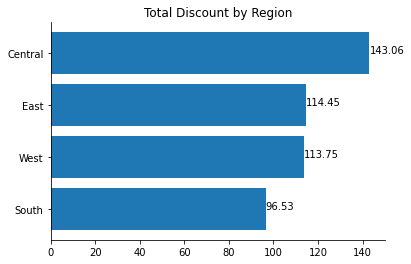

In [33]:
dis_by_region= df1.groupby('Region')['Discount'].sum().sort_values()
plt.barh(dis_by_region.index,dis_by_region.values)

# for displaying text on graph
for index, value in enumerate(dis_by_region.values):
    plt.text(value, index,
             str(value))

plt.title('Total Discount by Region')
sns.despine()
plt.show()

### 13. List of unique Postal Code 

In [34]:
pc = df1['Postal Code'].sort_values().unique()
print('Unique Postal Codes:', pc)
print()
print(f"Total number of unique postal codes are: {len(pc)}")

Unique Postal Codes: ['10004' '10009' '1001' ... '99336' '99352' '99362']

Total number of unique postal codes are: 1697


In [35]:
df1[['Customer Segment','Profit']]

,Customer Segment,Profit
0,Corporate,1.320000
1,Corporate,4.560000
2,Corporate,-47.640000
3,Corporate,-30.510000
4,Corporate,998.202300
...,...,...
9421,Consumer,137.860000
9422,Consumer,-39.070000
9423,Consumer,-1225.029097
9424,Consumer,349.485000


### 14. Which Customer Segment is Most Profitable

Corporate : 505538.62778304
Small Business : 316474.59248165396
Home Office : 283869.5538145
Consumer : 206559.62534845597
------
Customer Segment with most Profitability
Corporate : $505538.62778304


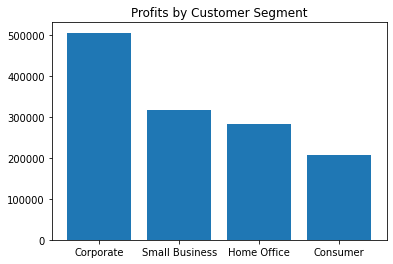

In [36]:
segment = df1.groupby('Customer Segment')['Profit'].sum().sort_values(ascending=False)
for i in range(len(segment)):
    print(segment.index[i],':',segment.values[i])
print('------')

# Customer Segment with most profitability
print('Customer Segment with most Profitability')
print(segment.index[0],':',f'${segment[0]}')

# Plotting
plt.title('Profits by Customer Segment')
plt.bar(segment.index, segment.values)
plt.show()



### 15. 10th most loss making product category

In [37]:
df1.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID', 'Status', 'Manager',
       'Delivery Days'],
      dtype='object')

In [38]:
loss = df1.groupby('Product Sub-Category')['Profit'].sum().sort_values(ascending=False)

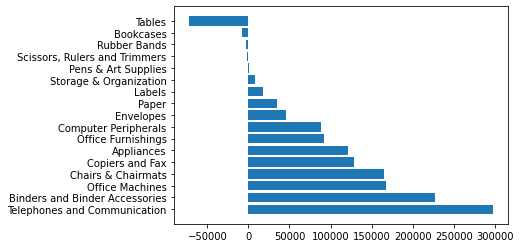

In [39]:
plt.barh(loss.index,loss.values)
plt.show()

Product Name: Eldon ClusterMat Chair Mat with Cordless Antistatic Protection
Amount: -9543.6525


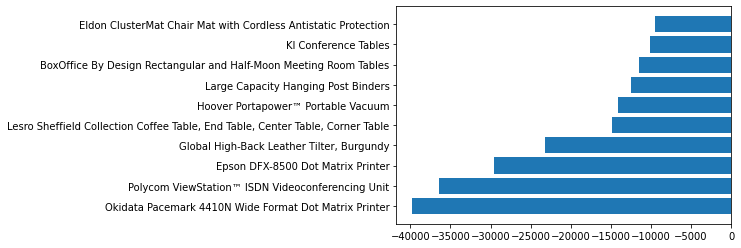

In [40]:
product_loss = df1.groupby('Product Name')['Profit'].sum().sort_values().head(10)
print(f'Product Name: {product_loss.index[-1]}')
print(f'Amount: {product_loss[-1]}')

# plotting
plt.barh(product_loss.index, product_loss.values,align='center')
plt.show()

### 16. top 10 products with highest margins

In [41]:
df1.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID', 'Status', 'Manager',
       'Delivery Days'],
      dtype='object')

In [47]:
product_columns = ['Product Category', 'Product Sub-Category', 'Product Container','Product Name', 'Product Base Margin']
df1[product_columns]

,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin
0,Office Supplies,Labels,Small Box,Avery 49,0.36
1,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54
2,Office Supplies,Paper,Small Box,Xerox 1968,0.37
3,Office Supplies,"Scissors, Rulers and Trimmers",Small Pack,Acme® Preferred Stainless Steel Scissors,0.56
4,Technology,Telephones and Communication,Small Box,V70,0.59
...,...,...,...,...,...
9421,Office Supplies,Envelopes,Small Box,Jet-Pak Recycled Peel 'N' Seal Padded Mailers,0.40
9422,Office Supplies,Pens & Art Supplies,Wrap Bag,"Eldon Spacemaker® Box, Quick-Snap Lid, Clear",0.54
9423,Furniture,Tables,Jumbo Box,Chromcraft Bull-Nose Wood Oval Conference Tabl...,0.71
9424,Furniture,Office Furnishings,Medium Box,"Tenex 46"" x 60"" Computer Anti-Static Chairmat,...",0.65


In [50]:
col = ['Product Base Margin']
top10 = df1.groupby('Product Name')[col].mean().sort_values(by=col,ascending=False).head(10)

In [52]:
# top 10 products with highest base margin
top10

,Product Base Margin
Product Name,
Office Impressions Heavy Duty Welded Shelving & Multimedia Storage Drawers,0.85
Accessory27,0.85
Sterling Rubber Bands by Alliance,0.85
Belkin OmniView SE Rackmount Kit,0.85
Accessory4,0.85
"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelves, 24"" Deep, Sand",0.84
Tennsco Commercial Shelving,0.84
Serrated Blade or Curved Handle Hand Letter Openers,0.84
Accessory36,0.83
